<a href="https://colab.research.google.com/github/SoumyajeetM/EDA_E-Commerce_Sales/blob/main/Cleaning_Chi_Square_EDA_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FRESH FINDINGS LTD.**

---

## **Exploratory Data Analysis with Python**
## **Objectives**


*   Strategized Improvement
*   New product Sales Analysis



In [ ]:
#Importing Common Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Read File
file_name='Fresh Findings Ltd Dataset.csv'
df=pd.read_csv(file_name)


In [ ]:
df.head()

,Year Born,EduFtion,Marital Status,Income,Kids,Teens,Date Enrolled,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products
0,1985,2n Class,Together,"$7,500.00",1,0,NaN,98,5,17,17,13,14,34
1,1976,Graduation,Together,"$78,416.00",0,1,6/27/14,99,453,38,279,188,38,183
2,1966,Graduation,Married,"$44,794.00",0,1,06-08-2014,99,54,0,7,0,0,4
3,1966,Graduation,Married,"$44,794.00",0,1,06-08-2014,99,54,0,7,0,0,4
4,1974,Graduation,Single,"$69,719.00",0,0,5/26/14,99,273,86,208,177,14,43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Born       2240 non-null   int64 
 1   EduFtion        2240 non-null   object
 2   Marital Status  2240 non-null   object
 3    Income         2216 non-null   object
 4   Kids            2240 non-null   int64 
 5   Teens           2240 non-null   int64 
 6   Date Enrolled   2239 non-null   object
 7   Recency         2240 non-null   int64 
 8   Wines           2240 non-null   int64 
 9   Fruits          2240 non-null   int64 
 10  Meat Products   2240 non-null   int64 
 11  Fish Products   2240 non-null   int64 
 12  Sweet Products  2240 non-null   int64 
 13  Gold Products   2240 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 245.1+ KB


In [ ]:
def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing
missingdata = missingdata_percentage(df)
missingdata.sort_values('percentage', ascending=False)

,category,percentage
0,Income,1.071429
1,Date Enrolled,0.044643


In [ ]:
# Correcting naming in headers
df.rename(columns={'EduFtion': 'Education', ' Income ': 'Income','Gold Products':'Gold_Products'}, inplace=True)
# Changing text of Income column to be able to convert to float
df["Income"]=df["Income"].str.replace('$','')
df["Income"]=df["Income"].str.replace(',','')
# Convert to float
df["Income"] = df['Income'].astype('float')
# 1% of Income is blank. hence we will replace it with mean value of entire column.
df["Income"].fillna(df["Income"].mean(), inplace = True)

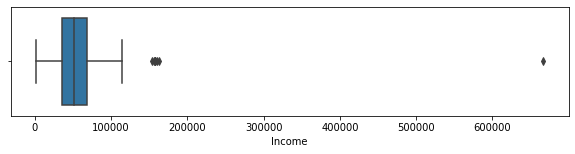

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(df['Income'])
plt.show()

In [ ]:
df['Marital Status'].unique()

array(['Together', 'Married', 'Single', 'Widow', 'Divorced', 'Divorcd',
       'YOLO', 'Singl', 'Alone', 'Absurd'], dtype=object)

In [ ]:
# Overall Data Cleaning
# Correcting naming in headers
df.rename(columns={'EduFtion': 'Education', ' Income ': 'Income','Gold Products':'Gold_Products'}, inplace=True)

# Correcting Marital Status column
df.loc[df['Marital Status'] == 'Singl', 'Marital Status'] = 'Single'
# 'Alone' Marital Status are put in 'Single Category' as both means the same
df.loc[df['Marital Status'] == 'Alone', 'Marital Status'] = 'Single'
df.loc[df['Marital Status'] == 'Divorcd', 'Marital Status'] = 'Divorced'

# Correcting Date column
df['Date Enrolled'] = pd.to_datetime(df['Date Enrolled'])

# Date enrolled has not much relevance in the analayis, hence NOT dropping the 1 particular row.
#df.dropna(subset=['Date Enrolled'], inplace=True)

# Changing text of Income column to be able to convert to float
#df["Income"]=df["Income"].str.replace('$','')
#df["Income"]=df["Income"].str.replace(',','')
# Convert to float
df["Income"] = df['Income'].astype('float')
# 1% of Income is blank. hence we will replace it with mean value of entire column.
df["Income"].fillna(df["Income"].mean(), inplace = True)
# Excluding some outliers
df = df[df['Income'] < np.nanpercentile(df['Income'], 99.99)]

# Crating 'Age' column
# Since Last 2 years data is of 2013,2014, hence, age at time of analysis is taken of year - 2014.
df['Age'] = (2014 - df['Year Born'])

#Adding column of total expenditure
df['Total Expenditure']= df.iloc[:, -7:-1].sum(axis=1)

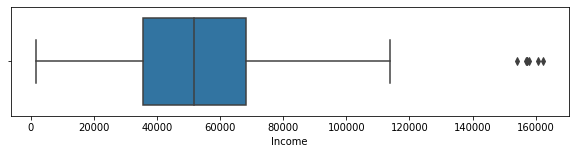

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(df['Income'])
plt.show()

## **PROBLEM STATEMENT ANALYSIS**


---



1. **Is the average salary of PhD owners statistically different from Master owners? It is believed that people with higher Education levels earn more and hence are more likely to invest in Gold Products. Ponder upon the marketing strategies that could be used for selling Gold Products for each group.**

In [ ]:
# Calculating average income and wine expenditure on the basis of different education levels.
df.groupby('Education').Income.mean(),df.groupby('Education').Gold_Products.mean()

(Education
 2n Class      47701.378099
 Basic         20306.259259
 Graduation    52170.506896
 Master        52908.476370
 PhD           56105.210405
 Name: Income, dtype: float64, Education
 2n Class      46.399015
 Basic         22.833333
 Graduation    50.883659
 Master        40.397297
 PhD           32.310700
 Name: Gold_Products, dtype: float64)

Numbers are clearly depicting that higher education levels have higher income.

(0.0, 170430.35)

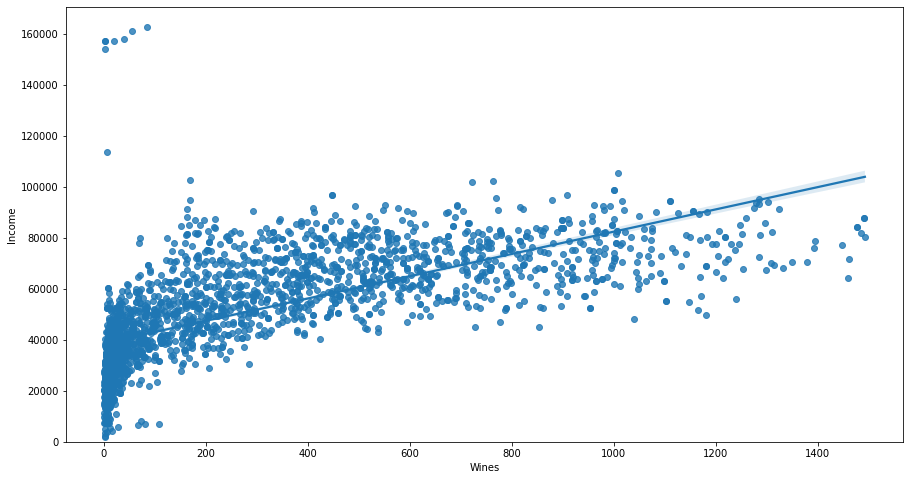

In [ ]:
# Regression plot for Income vs Wines Expenditure
plt.figure(figsize=(15, 8))
sns.regplot(x="Wines", y="Income", data=df)
plt.ylim(0,)

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Income'], df['Wines'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6860099986106508  with a P-value of P = 2.715979674388e-311


## **Comment**

---



*   Based on the mean values of all unique education levels, people with Phd earn higher income than with masters than with graduation. Hence, higher education people are more likely to earn more.
*   Correlation and p-value suggest that 'Income' and 'Wines' expenditure are correlated. Hence, higher income population can be targetted for 'Gold Products'.





---



2. **Is the correlation between the annual income and the amount of
spending in the last 2 years statistically significant? How does the
knowledge of this would be beneficial for the Fresh Findings Ltd? Is
targeting the high annual-income customers feasible for the Fresh
Findings Ltd.?**

(0.0, 3413.766284384626)

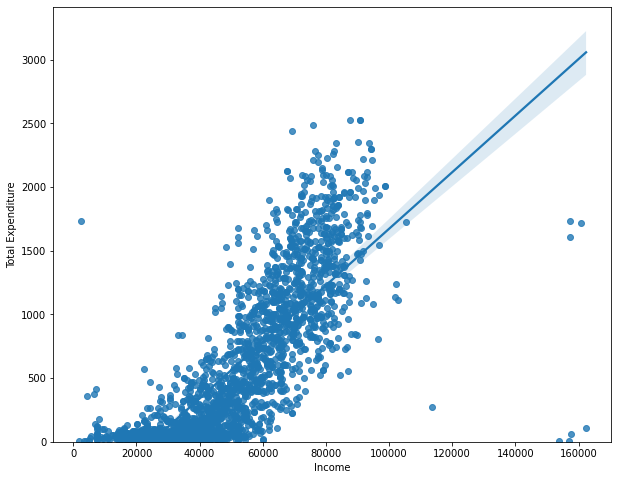

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(x="Income", y="Total Expenditure", data=df)
plt.ylim(0,)

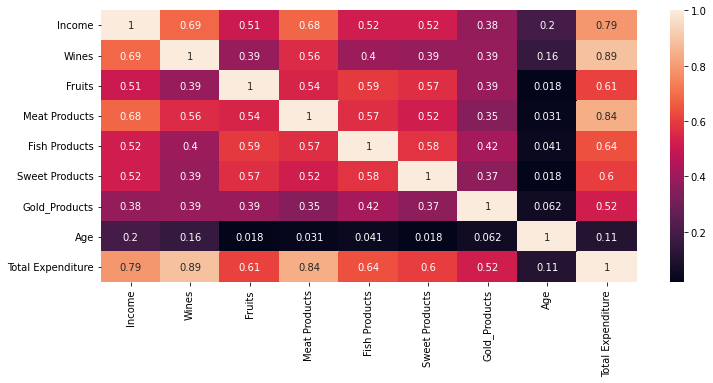

In [ ]:
# Extracting the numeric features from previous application data to box plot the correlation

numeric_features = []
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        numeric_features.append(col)
num_df = pd.DataFrame()

for col in numeric_features:
    num_df[col] = df[col]

# Removing columns like 'Year Born', 'Teens','Kids', 'Recency'
# Although this will temporary clean for the boxplot
del num_df["Year Born"]
del num_df["Kids"]
del num_df["Teens"]
del num_df["Recency"]
#del num_df["Age"]

# Checking correlation between numeric features of previous application data
plt.figure(figsize=(12,5))
sns.heatmap(num_df.corr(), annot=True)
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Income'], df['Total Expenditure'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7892131668129168  with a P-value of P = 0.0


## **Comment**

---



*   The Pearson Correlation Coefficient and p-value clearly indicates that 'Income' and 'Total Expenditure' are highly correlated.






---



3.**It is believed that educated and married customers are more likely to
spend on Wines than the others. Analyse the data to find out if this
assumption is true or not. Further, find whether Educated and Married
Customers are independent.**

In [ ]:
df.groupby('Education').Wines.mean(),df.groupby('Marital Status').Wines.mean()
#df[(df.Education == "Master" or "PhD") & (df['Marital Status'] == "Married")].Wines.mean()

(Education
 2n Class      198.182266
 Basic           7.240741
 Graduation    284.513321
 Master        333.075676
 PhD           404.495885
 Name: Wines, dtype: float64, Marital Status
 Absurd      355.500000
 Divorced    324.844828
 Married     299.480324
 Single      287.687371
 Together    307.340242
 Widow       369.272727
 YOLO        322.000000
 Name: Wines, dtype: float64)

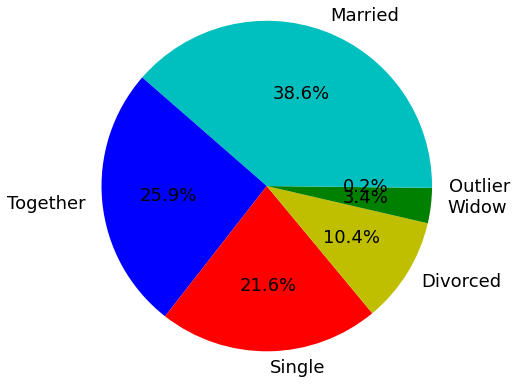

In [ ]:
df_marital = df[['Marital Status']]
df_marital.loc[df_marital['Marital Status'] == 'Absurd', 'Marital Status'] = 'Outlier'
df_marital.loc[df_marital['Marital Status'] == 'YOLO', 'Marital Status'] = 'Outlier'
colors = ["c", 'b','r','y','g']
df_marital['Marital Status'].value_counts().plot(kind='pie',
autopct='%1.1f%%', radius = 1.9, fontsize=18, ylabel = '', colors = colors)
#plt.ylabel("")

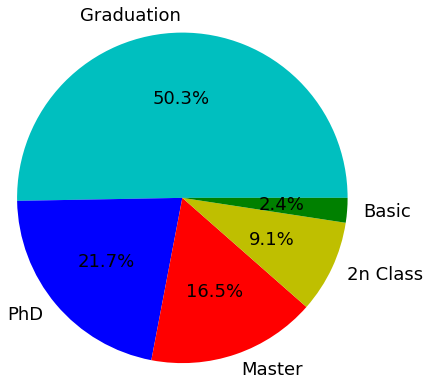

In [ ]:
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%', radius = 1.9, fontsize=18, ylabel = '', colors = colors)




*   Married customers are relatively more as compared to other customers
*   Educated(Graduation,Masters, Phd) customers consume wine more than the rest.


---



### **CHI-SQUARE TEST OF INDEPENDENCE**

In [ ]:
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

df_married = df[['Education','Marital Status','Wines']]
df_married = df_married[df_married['Marital Status'] == 'Married']

df_married.groupby('Education').Wines.mean(), df_married.groupby('Education').Wines.count()
#chi2_contingency(pandas.crosstab(df_married['Education'],df_married['Marital Status']))

(Education
 2n Class      154.777778
 Basic          15.200000
 Graduation    272.568129
 Master        327.717391
 PhD           430.536458
 Name: Wines, dtype: float64, Education
 2n Class       81
 Basic          20
 Graduation    433
 Master        138
 PhD           192
 Name: Wines, dtype: int64)

In [ ]:
chisq_of_df_cols(df, 'Education', 'Marital Status')

(25.94087909576719,
 0.3561716165761759,
 24,
 array([[1.81330951e-01, 4.82358196e-02, 1.00580616e+00, 3.30504690e-01,
         4.34122376e-01],
        [2.10343904e+01, 5.59535507e+00, 1.16673515e+02, 3.83385440e+01,
         5.03581956e+01],
        [7.83349710e+01, 2.08378741e+01, 4.34508263e+02, 1.42778026e+02,
         1.87540866e+02],
        [4.37914247e+01, 1.16489504e+01, 2.42902188e+02, 7.98168825e+01,
         1.04840554e+02],
        [5.24953104e+01, 1.39642698e+01, 2.91180884e+02, 9.56811076e+01,
         1.25678428e+02],
        [6.98124163e+00, 1.85707905e+00, 3.87235373e+01, 1.27244305e+01,
         1.67137115e+01],
        [1.81330951e-01, 4.82358196e-02, 1.00580616e+00, 3.30504690e-01,
         4.34122376e-01]]))

## **Comment**

---



*   The histogram clearly indicates that educated-married population is much higher in population and can be huge source of revenue for Fresh Findings Ltd.
*   Since, p-value > 0.05 and is nearly equal to 0.36.

Hence, we accept the null hypothesis that Educated and Married Customers data is independent.





---



4. **Based on the data about the expenditure on each item given, analyse
which age group can be targeted to have a 10% discount rate for Gold
Products. Support your answer with valid justification**

In [ ]:
df['Age'].describe()

count    2239.000000
mean       45.197856
std        11.985494
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

(0.0, 380.1)

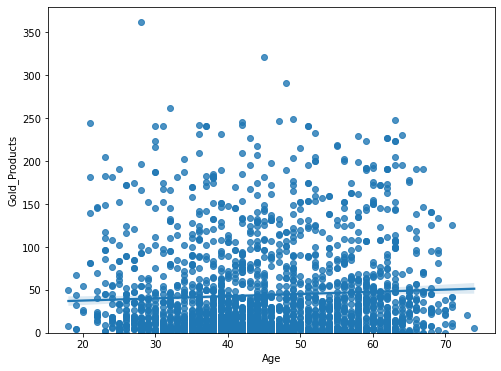

In [ ]:
# Handing some outliers
df = df[df['Age'] < np.nanpercentile(df['Age'], 99.9)]

plt.figure(figsize=(8, 6))
sns.regplot(x="Age", y="Gold_Products", data=df)
plt.ylim(0,)

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Age'], df['Gold_Products'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.057419476996675906  with a P-value of P = 0.0066099731496715




*   **Age and Gold product purchase does NOT have any correlation. P-value supports the statement.**
*   However, consumers data can be analysed to get range of 'Age' for 10% discount.



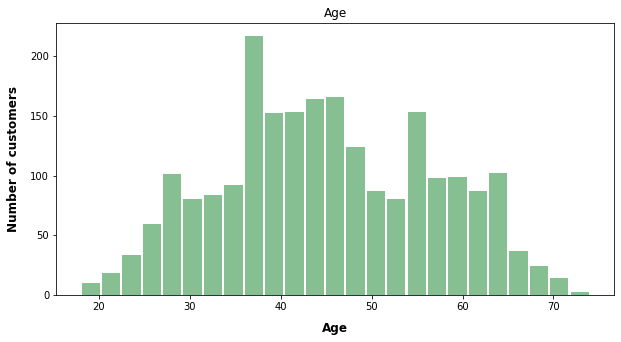

In [ ]:
#df.hist(column='Age')

ax = df.hist(column='Age', bins=25, grid=False, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:
    # Set x-axis label
    x.set_xlabel("Age", labelpad=10, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of customers", labelpad=10, weight='bold', size=12)


## **Comment**

---


**TARGET CUSTOMERS**

*  Consumers ages 27 – 45.(Preferably Women)
*   College educated
*   Income range 40,000  to  60,000
*   Professional careers
*   Target locations might include larger cities and their surrounding smaller areas

**FOR 10% DISCOUNT**


*   Consumers ages 45 - 55(Needs to be considered) as their income will be  higher and has a growth potential, as compared to age of 40.







In [ ]:
#----------------------------------------------------------------------------------Code Ends Here---------------------------------------------------------------

# **Submitted By-**


---


Soumyajeet Mohapatra

Roll No.- UM21299

(XAVIER INSTITUTE OF MANAGEMENT, BHUBANESWAR)